[View in Colaboratory](https://colab.research.google.com/github/mrrajeshreddy/Carvana-Image-Masking/blob/master/ImageSegmentation.ipynb)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from PIL import Image
import tensorflow as tf
from tensorflow.keras import losses
from tensorflow.keras import models
from tensorflow.keras import backend as K  
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

In [0]:
model_path = './gdrive/My Drive/model/UNET_Keras_weigh.h5'

In [0]:
def dice_coeff(y_true, y_pred):
    smooth = 1.
    # Flatten
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)
    return score
def dice_loss(y_true, y_pred):
    loss = 1 - dice_coeff(y_true, y_pred)
    return loss
def bce_dice_loss(y_true, y_pred):
    loss = losses.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)
    return loss

In [0]:
model = models.load_model(model_path, custom_objects={'bce_dice_loss': bce_dice_loss, 
                                                      'dice_loss': dice_loss,
                                                      'dice_coeff': dice_coeff
                                                      })

In [5]:
input_shape = model.input_shape
input_shape

(None, 256, 256, 3)

In [0]:
def get_image_segment(image_name, input_shape):
  orig_image = load_img( test_img_path )
  orig_size = orig_image.size
  test_image = orig_image.resize(input_shape, resample=Image.NEAREST)
  test_image =  img_to_array(test_image )
  test_image = test_image / 255
  test_image = np.expand_dims(test_image, 0)
  predict = model.predict(test_image)
  predict_img = array_to_img(predict[0])
  predict_img = predict_img.resize(orig_size)
  return orig_image, predict_img

In [0]:
def vis_segmentation(image, seg_map, seg_alpha=0.7):
  img_arr = img_to_array(image) / 255
  seg_arr = img_to_array(seg_map) / 255
 
  plt.figure(figsize=(15, 5))
  grid_spec = gridspec.GridSpec(1, 4, width_ratios=[6, 6, 6, 6])
  plt.subplot(grid_spec[0])
  plt.imshow(img_arr)
  plt.axis('off')
  plt.title('input image')
  
  plt.subplot(grid_spec[1])
  plt.imshow(seg_arr[:,:,0], cmap='gray')
  plt.axis('off')
  plt.title('segmentation map')
  
  plt.subplot(grid_spec[2])
  plt.imshow(img_arr)
  plt.imshow(seg_arr[:,:,0], alpha=seg_alpha, cmap='gray')
  plt.axis('off')
  plt.title('segmentation overlay')
  
  plt.subplot(grid_spec[3])
  plt.imshow((img_arr*seg_arr))
  plt.axis('off')
  plt.title('Segmented image')
  
  plt.show()

In [0]:
def segment_image(image_path):
  image, segment = get_image_segment(image_path, input_shape[1:3])
  vis_segmentation(image, segment, seg_alpha=0.5)

In [0]:
test_img_path = "./gdrive/My Drive/TestFiles/new_car.jpg" #@param

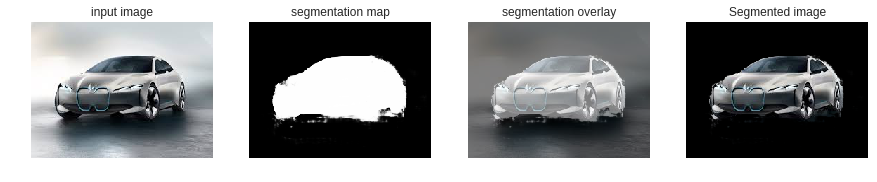

In [10]:
segment_image(test_img_path)